# Sample Model Notebook

The purpose of this [Jupyter notebook](http://jupyter.readthedocs.io/en/latest/index.html) is to evaluate some of our models on cities and compare their relative performances.

In this case, we are looking at **traffic** models in particular.

## 1. Setup

First, I must import all necessary libraries for the notebook.

In [16]:
import sys

import keras
import keras.backend as K
import numpy as np
from keras.models import load_model
from glob import glob

sys.path.append('../global/')
import cityiograph

In [33]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

/Users/Kevin/anaconda/envs/python3_env/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Next, I must define all key configurations.

In [5]:
city_dir = '../../../data/new_traffic_cities/*/*.json'
model_path = '../MachineLearning/runs/38/final_model.hdf5'

## 2. Load Model

In [12]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [13]:
model = load_model(model_path, custom_objects={'coeff_determination': coeff_determination})

## 3. Load Data

In [64]:
sample_file = np.random.choice(glob(city_dir))

In [65]:
with open(sample_file, 'r') as f:
    city = cityiograph.City(f.read())

In [66]:
inp = cityiograph.get_features(city, mode='traffic')
out = cityiograph.get_results(city, mode='traffic')
# Reshape
inp = inp.reshape(16, 16, 2)
out = out.reshape(16, 16, 2)

In [67]:
inp.shape

(16, 16, 2)

In [68]:
inp = np.expand_dims(inp, axis=0)

In [69]:
inp.shape

(1, 16, 16, 2)

In [70]:
out = np.expand_dims(out, axis=0)

In [71]:
out.shape

(1, 16, 16, 2)

In [72]:
# Noramlize
inp = (inp - inp.mean()) / inp.std()
out = (out - out.mean()) / out.std()

## 4. Predict

In [73]:
pred = model.predict(inp)

In [74]:
pred.shape

(1, 16, 16, 2)

## 5. Visualize

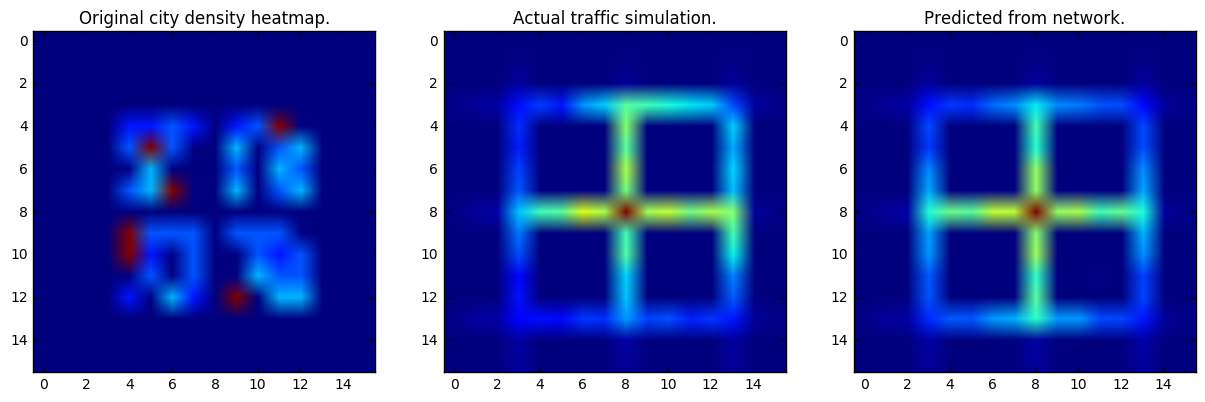

In [75]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(inp[0, :, :, 0])
plt.title("Original city density heatmap.")

plt.subplot(1, 3, 2)
plt.imshow(out[0, :, :, 0])
plt.title("Actual traffic simulation.")

plt.subplot(1, 3, 3)
plt.imshow(pred[0, :, :, 0])
plt.title("Predicted from network.")

plt.show()

## 6. Iterate

Let's repeat this same process for many cities and take a look at the result.

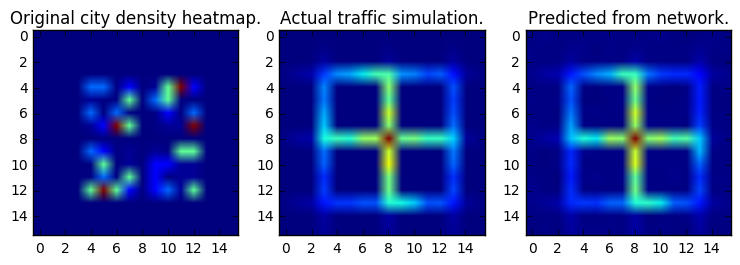

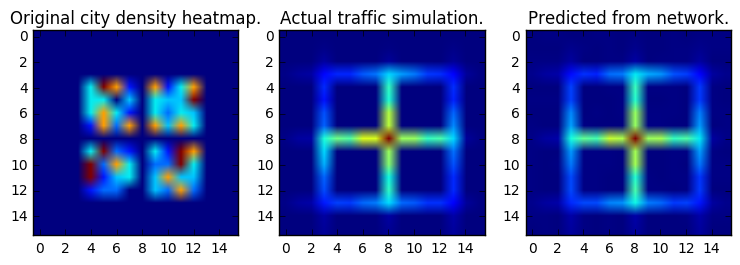

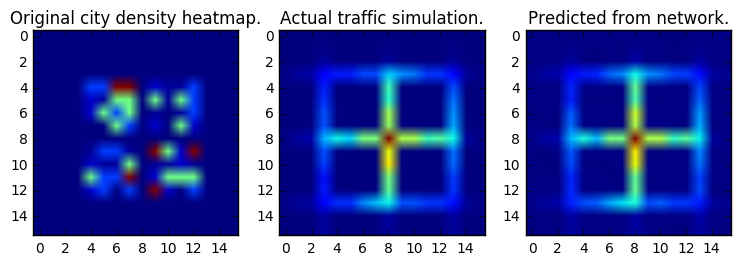

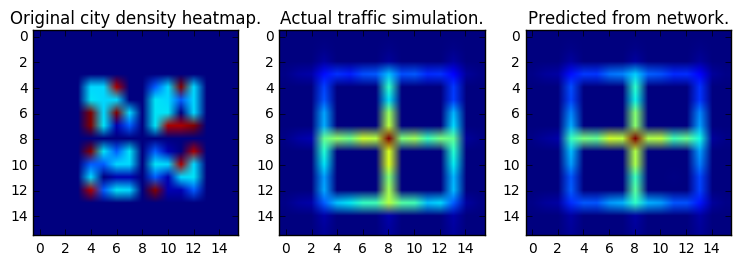

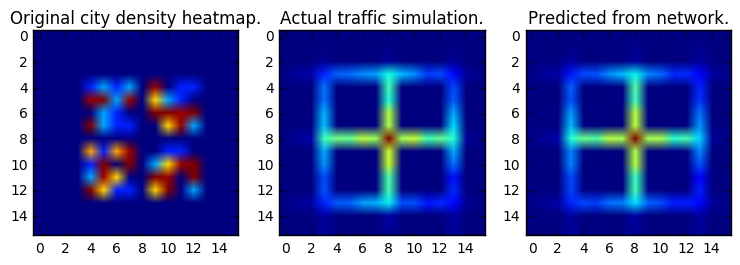

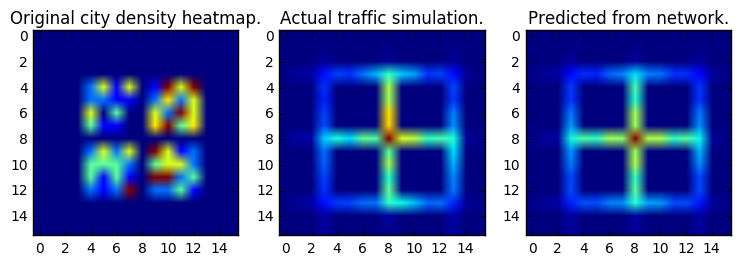

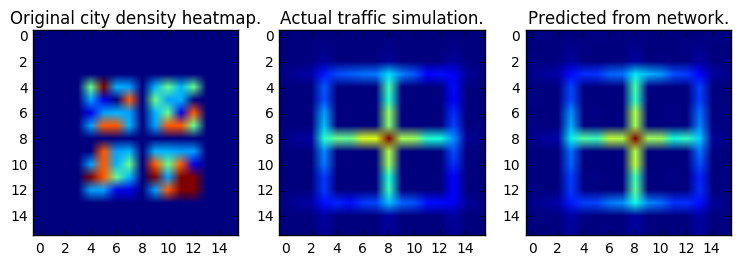

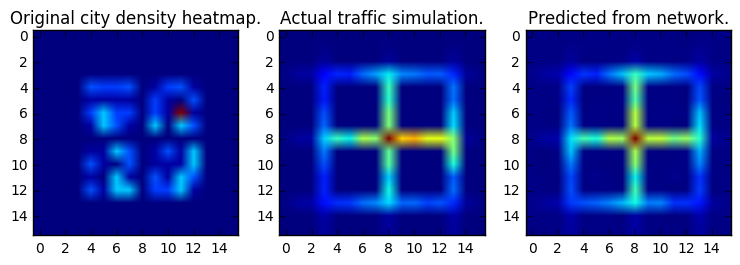

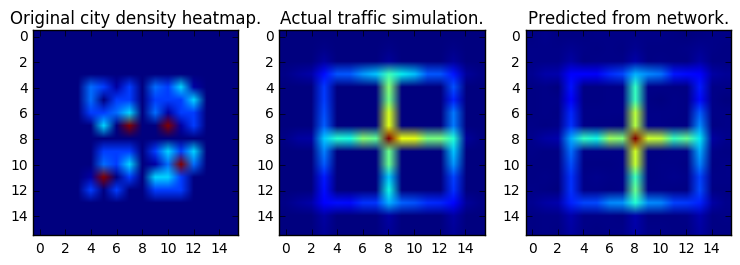

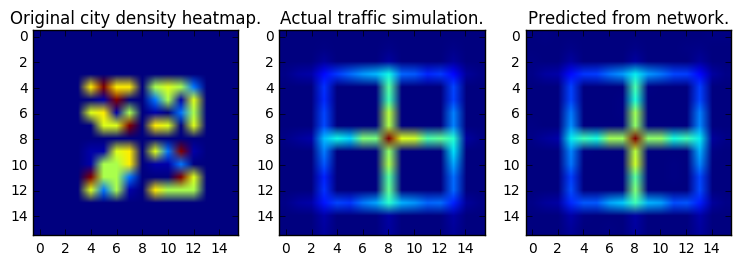

In [77]:
num_cities = 10

for city_path in np.random.permutation(glob(city_dir))[:num_cities]:
    with open(city_path, 'r') as f:
        city = cityiograph.City(f.read())
    
    # Extract
    inp = cityiograph.get_features(city, mode='traffic')
    out = cityiograph.get_results(city, mode='traffic')
    # Reshape
    inp = inp.reshape(16, 16, 2)
    out = out.reshape(16, 16, 2)
    inp = np.expand_dims(inp, axis=0)
    out = np.expand_dims(out, axis=0)
    # Noramlize
    inp = (inp - inp.mean()) / inp.std()
    out = (out - out.mean()) / out.std()
    # Predict
    pred = model.predict(inp)
    # Visualize
    plt.figure(figsize=(9, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(inp[0, :, :, 0])
    plt.title("Original city density heatmap.")

    plt.subplot(1, 3, 2)
    plt.imshow(out[0, :, :, 0])
    plt.title("Actual traffic simulation.")

    plt.subplot(1, 3, 3)
    plt.imshow(pred[0, :, :, 0])
    plt.title("Predicted from network.")

    plt.show()
    